# Week04 : Logistic Regression

- **Student ID** : 2021111000
- **Name** : 조민준

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week04_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week04\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

# 1. Logistic regression by gradient descent 

### Sample dataset 
- Task: predicting $ x \rightarrow y$ (0 or 1)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# x_train is the vector of input variables 
# y_train is the vector of target values (class labels)

x_train = np.array([0.5, 2.5, 4.0, 6.0, 7.5, 9.5])
y_train = np.array([0, 0, 0, 1, 1, 1])

print('x_train =', x_train)
print('y_train =', y_train)

x_train = [0.5 2.5 4.  6.  7.5 9.5]
y_train = [0 0 0 1 1 1]


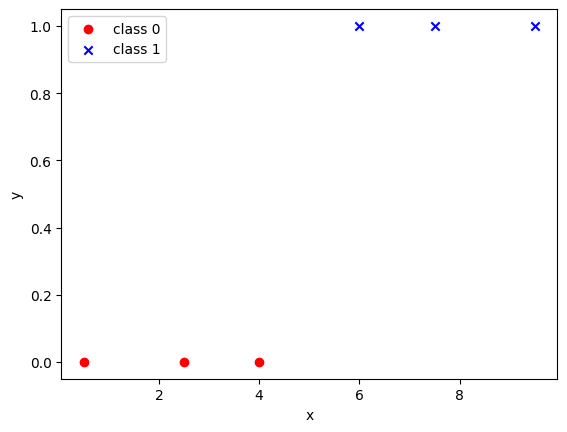

In [26]:
# plot the data points. first 3 data(class 0) as red, next 3 data(class 1) as blue
plt.scatter(x_train[:3], y_train[:3],
            color='red', marker='o', label='class 0')
plt.scatter(x_train[3:], y_train[3:],
            color='blue', marker='x', label='class 1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

### Classification and decision boundary 
- Model : $y = sigmoid(x - 5)$
- decision boundary: $x - 5 = 0$

In [27]:
# the sigmoid function
def sigmoid(z):

    # sigmoid
    y = 1 / (1 + np.exp(-z))
   
    return y

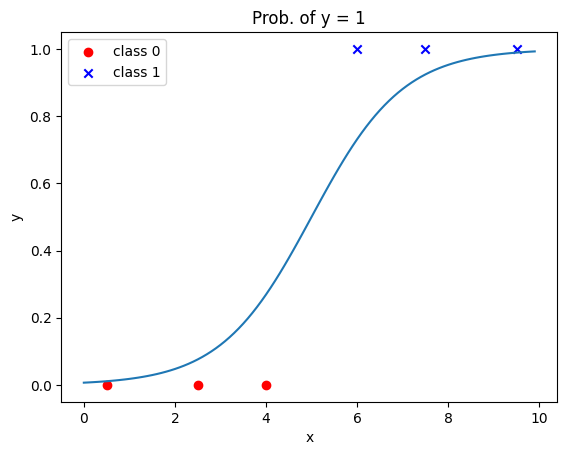

In [28]:
# plot the data points
plt.scatter(x_train[:3], y_train[:3],
            color='red', marker='o', label='class 0')
plt.scatter(x_train[3:], y_train[3:],
            color='blue', marker='x', label='class 1')

# predict y_hat for x in [0, 10]
x = np.arange(0, 10, 0.1)
y_hat = sigmoid(x - 5)

# plot y_hat
plt.plot(x, y_hat)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Prob. of y = 1')
plt.legend(loc='upper left')
plt.show()

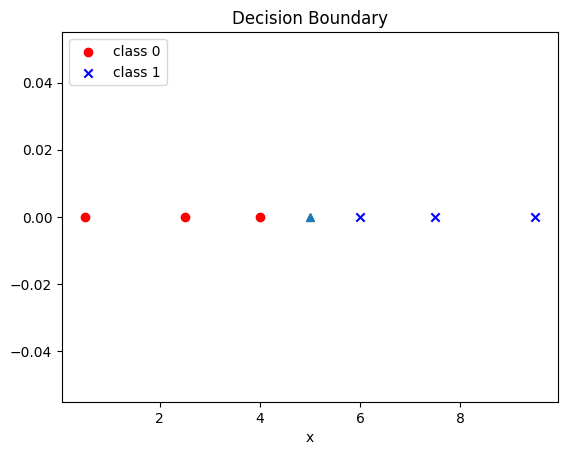

In [29]:
# plot the data points in x axis
plt.scatter(x_train[:3], [0, 0, 0],
            color='red', marker='o', label='class 0')
plt.scatter(x_train[3:], [0, 0, 0],
            color='blue', marker='x', label='class 1')

# show decision boundary
x = 5
plt.plot(x, 0, marker='^')

plt.xlabel('x')
plt.title('Decision Boundary')
plt.legend(loc='upper left')
plt.show()

### Sample dataset - 2D
- Task: predicting $ x_{0}, x_{1} \rightarrow y$ (0 or 1)
- Be careful! the name of dataset is X_train, not x_train!

In [30]:
# x_train is the vector of input variables 
# y_train is the vector of target values (class labels)

X_train = np.array([[0.5, 1.5], [1.0, 1.0], [1.0, 0.5], 
                    [2.5, 1.5], [2.0, 2.0], [1.0, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

print('X_train =', X_train)
print('y_train =', y_train)

X_train = [[0.5 1.5]
 [1.  1. ]
 [1.  0.5]
 [2.5 1.5]
 [2.  2. ]
 [1.  2.5]]
y_train = [0 0 0 1 1 1]


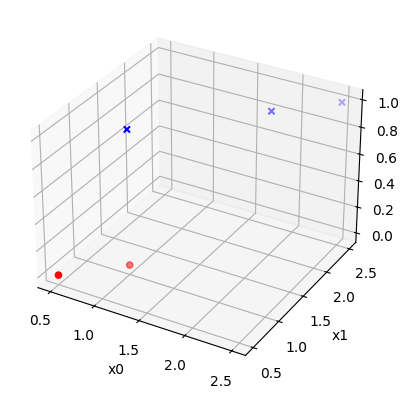

In [31]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points in 3D
ax.scatter(X_train[:3, 0], X_train[:3, 0], y_train[:3], marker='o', c='red')
ax.scatter(X_train[3:, 0], X_train[3:, 0], y_train[3:], marker='x', c='blue')

plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

### Classification by a linear model 
- model : $y = sigmoid(\mathbf{x \cdot w} + b) = sigmoid(w_{0} x_{0} + w_{1} x_{1} + b)$
- decision boundary: $\mathbf{x \cdot w} + b = w_{0} x_{0} + w_{1} x_{1} + b = 0$

In [32]:
# predict class by a linear model
# x : array (m, n) - m examples with n features
# y : vector (m, ) 
# w : model parameters (n, )
# b : model parameter scalar 

def predict(x, w, b):

    # predict y_hat by the model y = sigmoid(xw + b)
    y_hat = sigmoid(np.dot(x,w) + b)
    
    # class = 1 if y_hat >= 0.5. use np.where()
    y = np.where(y_hat >= 0.5, 1, 0)
    
    return y

- Prediction - single data

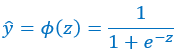
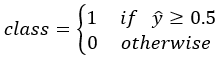

In [33]:
# arbitrary model parameter 
w = [1.0, 1.0]
b = 1.0

print('x = ', X_train[0])
print('y = ', y_train[0])

# print y_hat = sigmoid(z), z = xw + b  
z = np.dot(X_train[0], w) + b
y_hat = sigmoid(z)

print('y_hat = sigmoid(xw + b) = ', y_hat)

# predict class
print('class prediction = ', predict(X_train[0], w, b))

x =  [0.5 1.5]
y =  0
y_hat = sigmoid(xw + b) =  0.9525741268224334
class prediction =  1


- Prediction - all data


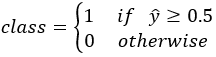

In [34]:
# arbitrary model parameter 
w = [1.0, 1.0]
b = 1.0

print('X = \n', X_train)
print('y = \n', y_train)

# print y_hat = sigmoid(z), z = xw + b  
z = np.dot(X_train, w) + b
y_hat = sigmoid(z)

print('y_hat = sigmoid(xw + b) = \n', y_hat)

# predict class
print('class prediction = \n', predict(X_train, w, b))

X = 
 [[0.5 1.5]
 [1.  1. ]
 [1.  0.5]
 [2.5 1.5]
 [2.  2. ]
 [1.  2.5]]
y = 
 [0 0 0 1 1 1]
y_hat = sigmoid(xw + b) = 
 [0.95257413 0.95257413 0.92414182 0.99330715 0.99330715 0.98901306]
class prediction = 
 [1 1 1 1 1 1]


### Cost function 
- Binary Cross Entropy
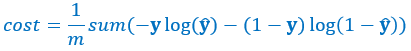

In [35]:
# Computes the cost function - BCE

def compute_cost(X, y, w, b): 
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    
    # compute y_hat = sigmoid(z), z = xw + b  
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    
    # compute cost = binary cross entropy. Use np.log() 
    cost = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    cost = np.sum(cost) / m
    
    return cost


In [36]:
print('w =', w)
print('b =', b)
print('y_train =', y_train)

z = np.dot(X_train, w) + b
y_hat = sigmoid(z)
print('y_hat =  ', y_hat)

# check the cost for the model with current w, b
cost = compute_cost(X_train, y_train, w, b)

print('--> cost =', cost)

w = [1.0, 1.0]
b = 1.0
y_train = [0 0 0 1 1 1]
y_hat =   [0.95257413 0.95257413 0.92414182 0.99330715 0.99330715 0.98901306]
--> cost = 1.4500904798778118


### Computing gradients
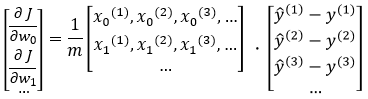
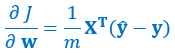
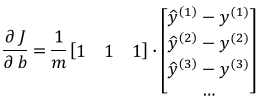
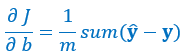

In [43]:
def compute_gradient(X, y, w, b): 
    """
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    
    dj_dw = np.zeros((n,))                          
    dj_db = 0.

    # compute y_hat
    y_hat = sigmoid(np.dot(X, w) + b)
    err = y_hat - y   
    
    # compute gadients
    dj_dw = np.dot(X.T, err) / m
    dj_db = np.sum(err) / m
       
    return dj_dw, dj_db

In [44]:
print('w =', w)
print('b =', b)
print('X_train =', X_train)
print('y_train =', y_train)

# check the gradients for current w, b
dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)

print('dj_dw =', dj_dw)
print('dj_db =', dj_db)

w = [1.0, 1.0]
b = 1.0
X_train = [[0.5 1.5]
 [1.  1. ]
 [1.  0.5]
 [2.5 1.5]
 [2.  2. ]
 [1.  2.5]]
y_train = [0 0 0 1 1 1]
dj_dw = [0.38531637 0.46543565]
dj_db = 0.46748623819074336


### Gradient descent
- Repeat
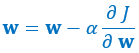

In [45]:
def gradient_descent(X, y, w, b, alpha, num_iters): 
    """
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
    """
    # a list to store cost J at each iteration
    J_history = []
    
    for i in range(num_iters):
 
        # compute the gradient 
        dj_dw, dj_db = compute_gradient(X, y , w, b)   

        # update Parameters 
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db   
      
        # save cost to J_history list 
        J_history.append(compute_cost(X, y, w, b) )

        # print cost every 1000 iteration
        if (i % 1000) == 0:
            print('Iteration %5d: Cost %0.2e ' % (i, J_history[-1]))
       
    return w, b, J_history   

### Logistic regression by gradient descent
- Starting from initial parameters
- Use GD to get the parameters

In [46]:
# initialize parameters
w_init = np.zeros(X_train.shape[1])
b_init = 0.

# set the hyperparameters, 0.1 and 10000
alpha = 0.1
iterations = 10000

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_hat, w_init, b_init, alpha, iterations) 

# print the learned parameters
print(f"\n parameters: w = {w_final}, b = {b_final}")

Iteration     0: Cost 5.87e-01 
Iteration  1000: Cost 1.32e-01 
Iteration  2000: Cost 1.32e-01 
Iteration  3000: Cost 1.32e-01 
Iteration  4000: Cost 1.32e-01 
Iteration  5000: Cost 1.32e-01 
Iteration  6000: Cost 1.32e-01 
Iteration  7000: Cost 1.32e-01 
Iteration  8000: Cost 1.32e-01 
Iteration  9000: Cost 1.32e-01 

 parameters: w = [1.00892114 1.00406242], b = 0.9860159173341773


### Plotting cost change 

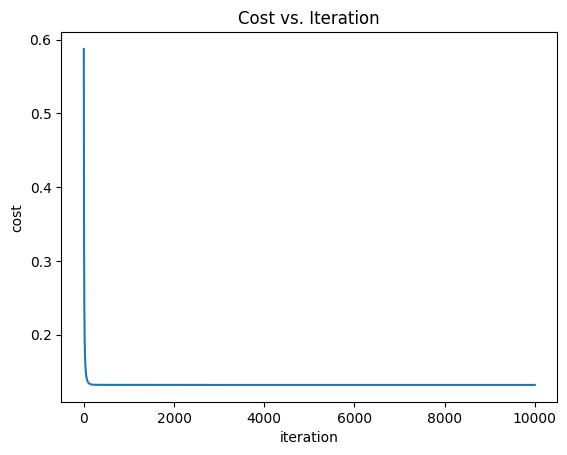

In [47]:
# plot cost during iteration 1 ~ 10000 
plt.plot(J_hist[:10000])


plt.title("Cost vs. Iteration")
plt.ylabel('cost') 
plt.xlabel('iteration')  
plt.show()

### Plotting the learned model


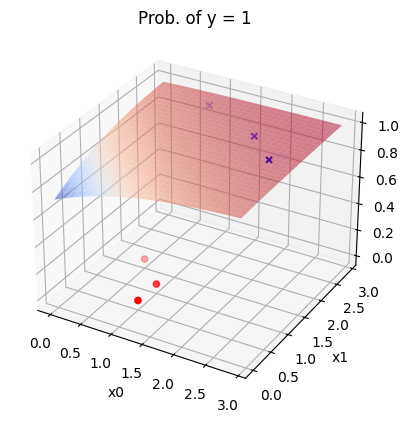

In [48]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points
ax.scatter(X_train[:3,0], X_train[:3,1], y_train[:3], marker='o', c='red')
ax.scatter(X_train[3:,0], X_train[3:,1], y_train[3:], marker='x', c='blue')

# compute y_hat for all meshgrid using learned w and b
x0 = np.arange(0, 3, 0.1)
x1 = np.arange(0, 3, 0.1)
x0, x1 = np.meshgrid(x0, x1)
y_hat = sigmoid(x0 * w_final[0] + x1 * w_final[1] + b_final)

# show the model by plotting y_hat
ax.plot_surface(x0, x1, y_hat, cmap=cm.coolwarm, alpha=0.5)

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Prob. of y = 1')
plt.show()

### Decisioin boundary in feature space

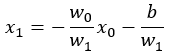

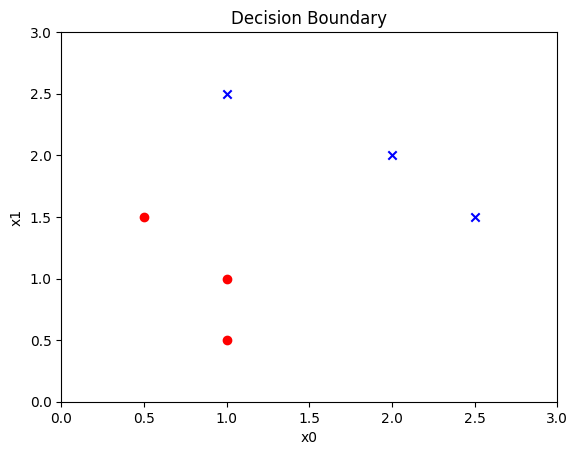

In [49]:
# plot the data points in feature space (x0, x1 plane)
plt.scatter(X_train[:3, 0], X_train[:3, 1], marker='o', c='red')
plt.scatter(X_train[3:, 0], X_train[3:, 1], marker='x', c='blue')

plt.axis([0, 3, 0, 3])

# decision boundary

x0 = np.arange(0,4)
x1 = -w_final[0] / w_final[1] * x0 - b_final / w_final[1]
plt.plot(x0, x1)

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Decision Boundary')
plt.show()

### Accuracy of the model

In [50]:
# Compute the class prediction and accuracy of the model
y_pred = predict(X_train, w_final, b_final)
accuracy = np.sum(y_train == y_pred)/len(y_train)

print("Accuracy on the training set =", accuracy)

Accuracy on the training set = 0.5


---

# 2. Logistic regression using scikit learn

### Load iris dataset
- x features:  
 0 - sepal length in cm  
 1 - sepal width in cm  
 2 - petal length in cm  
 3 - petal width in cm  
- y classes:  
 0 (Setosa) / 1 (Versicolor) / 2 (Virginica)
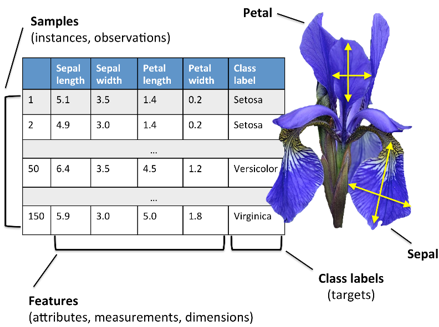

In [51]:
import numpy as np
import pandas as pd
from sklearn import datasets

# load the scikit learn iris dataset, use datasets.load_iris()
iris = datasets.load_iris()

# print data and feature names. data has 4 features
print(iris.data)
print(iris.feature_names)

# print target and feature names.target is 0(setosa), 1(versicolor), or 2(virginica)
print(iris.target)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [52]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [53]:
# get training data X, y by selecting first 100 examples
# select 2 features, 2:petal length and 3:petal width
X = iris.data[0:100,[2,3]]  
y = iris.target[0:100]

# print X, y shapes
print(X.shape)
print(y.shape)

# print class labels. use np.unique()
print('Class labels:', np.unique(y))

(100, 2)
(100,)
Class labels: [0 1]


### Plotting the data

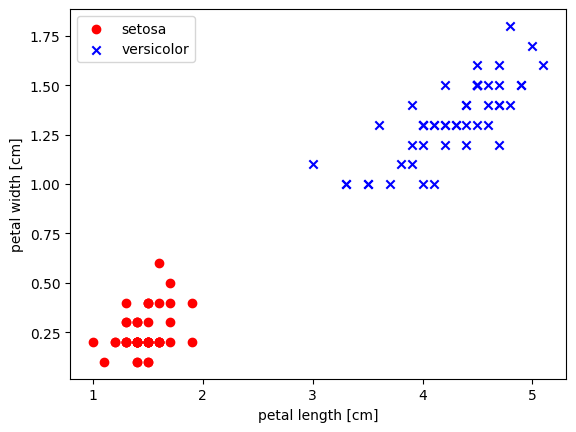

In [54]:
# plotting data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0],X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Splitting data into 70% training data & 30% test data

In [55]:
from sklearn.model_selection import train_test_split

# make training set and test set. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 1, stratify=y)

In [56]:
# check the shape of training and test data
print(X_train.shape)
print(X_test.shape)

(70, 2)
(30, 2)


### Training the model using LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression

# training the model. use LogisticRegression with C=100
lr = LogisticRegression(C=100.0)
lr.fit(X_train, y_train)

LogisticRegression(C=100.0)

In [58]:
# print the learned model parameters. w: coef_, b: intercept_
print('w =', lr.coef_)
print('b = ', lr.intercept_)

w = [[5.52734478 2.26785607]]
b =  [-16.33236067]


### Plotting decision regions
- use plot_decision_regions function below

In [59]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

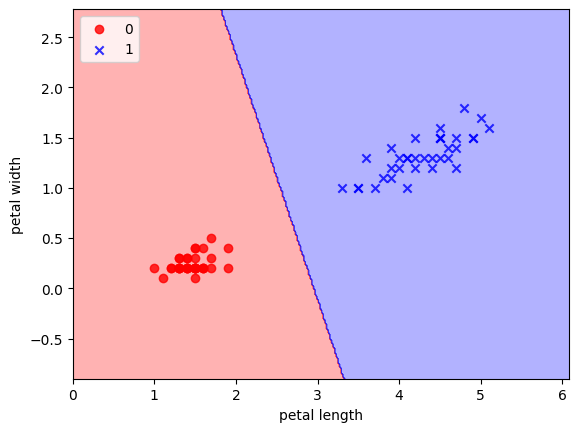

In [60]:
# plot decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=lr)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### Accuracy of the model

In [61]:
# train and test accuracy of the model. use .score(X, y)
print('Training accuracy: %.2f' % lr.score(X_train, y_train))
print('Test accuracy: %.2f' % lr.score(X_test, y_test))

Training accuracy: 1.00
Test accuracy: 1.00


### Probability of class 0 and 1 

In [62]:
# probability of class 0, 1 for first 5 test data. use .predict_proba()
print(lr.predict_proba(X_test[:5]))

[[2.70296563e-06 9.99997297e-01]
 [6.04085017e-02 9.39591498e-01]
 [9.99767710e-01 2.32289833e-04]
 [9.99596350e-01 4.03650310e-04]
 [9.99767710e-01 2.32289833e-04]]


### Prediction of class labels 

In [63]:
print('True test labels :', y_test[:5])

# predicting labels of first 5 test dataset
print('Predicted labels :', lr.predict(X_test[:5]))

True test labels : [1 1 0 0 0]
Predicted labels : [1 1 0 0 0]


---

# 3. Logistic Regression - Multinomial Classification

###  Load iris dataset

In [64]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
# get training data X, y from all 150 examples
# select 2 features, 2:petal length and 3:petal width
X = iris.data[:, [2,3]]  
y = iris.target

print(X.shape)
print(y.shape)
print('Class labels:', np.unique(y))

(150, 2)
(150,)
Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [68]:
from sklearn.model_selection import train_test_split
# train test split. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=1, stratify=y)

In [69]:
# check the shape of training and test data
print(X_train.shape)
print(X_test.shape)

(105, 2)
(45, 2)


### Plotting the training data

In [71]:
# plotting data for class 0, 1, 2
plt.scatter(X_train[y_train == 0, 0], X_train[y_train==0. 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1],
            color='lightgreen', marker='s', label='virginica')

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3784847066.py, line 2)

### Training the model using LogisticRegression
- 3 set of w and b parameters
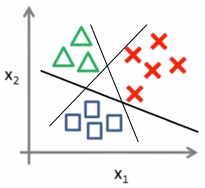 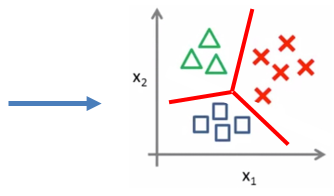

In [72]:
from sklearn.linear_model import LogisticRegression

# training the model. use LogisticRegression with C=100, multi_class='ovr'
lr = LogisticRegression(C = 100.0, random_state= 1, multi_class= 'ovr')

lr.fit(X_train, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [73]:
# print the learned model parameters. w: coef_, b: intercept_
print('w = ', lr.coef_)
print('w = ', lr.intercept_)

w =  [[-5.52741894 -2.26767352]
 [ 1.34492291 -2.71926866]
 [ 6.95808994  7.36736804]]
w =  [ 16.33234585  -2.59905851 -46.45251225]


### Plotting decision regions
- use plot_decision_regions function 

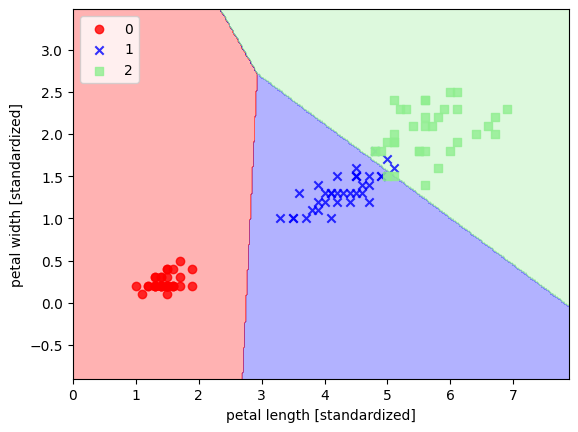

In [74]:
#X_combined_std = np.vstack((X_train_std, X_test_std))
#y_combined = np.hstack((y_train, y_test))

# decision boundary of the model 
plot_decision_regions(X_train, y_train, classifier=lr)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Accuracy of the model

In [75]:
# train and test accuracy of the model. use .score(X, y)
print('Training accuracy: %.2f' % lr.score(X_train, y_train))
print('Test accuracy: %.2f' % lr.score(X_test, y_test))

Training accuracy: 0.95
Test accuracy: 0.98


### Probability of class 0, 1, 2 

In [76]:
# probability of class 0, 1, 2 for first 5 test data. use .predict_proba()
print(lr.predict_proba(X_test[:5]))

[[6.27006745e-09 1.44806162e-01 8.55193832e-01]
 [8.34564702e-01 1.65435298e-01 1.46365975e-14]
 [8.49059341e-01 1.50940659e-01 8.82090981e-16]
 [1.35565353e-05 7.76776434e-01 2.23210009e-01]
 [3.69241060e-05 9.89606981e-01 1.03560948e-02]]


### Prediction of class labels 

In [77]:
# predicting labels of first 5 test dataset
y_pred = lr.predict(X_test)

print('True test labels :', y_test[:5])
print('Predicted labels :', y_pred[:5])

True test labels : [2 0 0 2 1]
Predicted labels : [2 0 0 1 1]


### Effect of regularization

In [78]:
# list of C values, learned weights, test accuracy 
params, weights, test_acc = [], [], []  

# learn weights w[1] and accuracy for C in 10**-5 to 10**5 
for c in np.arange(-5, 5):
    
    # learn the weights using LogisticRegression, multi_class='ovr'
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train, y_train)
    
    # record the C values, learned weights, test accuracy
    params.append(10.**c)
    weights.append(lr.coef_)
    test_acc.append(lr.score(X_test, y_test))


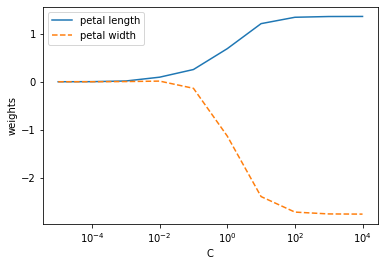

In [ ]:
weights = np.array(weights)

# plotting weights for each C
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')

plt.ylabel('weights')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

---

# Quiz 1 : Logistic Regression

## Find a model for cancer classification using Breast Cancer Wisconsin Dataset
- Train logistic regression model using all the features. The target class is 0(malignant) or 1(benign) 
- Use 70% of dataset for training, 30% for testing. Standardize the features
- Use predict(), compute_cost(), compute_gradient(), gradient_descent() functions

1. Show the learned model(parameters)
2. Plot the cost change during training
3. Show the decision boundary in x3(mean area), x4(mean smoothness) space
4. Show the train and test accuracies
5. Predict the class of following data (you need standardization):
          [[11.2, 18.5, 78.3, 451.00, 0.092, 0.081, 0.031, 0.042, 0.19, 0.062,
            0.33, 1.37, 2.33, 27.2, 0.0075, 0.016, 0.015, 0.010, 0.012, 0.0031,
            14.8, 28.6, 92.3, 632.1, 0.17, 0.32, 0.26, 0.21, 0.38, 0.0943]]
6. Show the probability of prediction 

### Loading Breast Cancer Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

# Converting to dataFrame and show
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Prepare training and test dataset - standardize data

In [2]:
# get X, y. Use all data, all features
X = bc.data
y = bc.target

print(X.shape)
print(y.shape)
print('Class labels:', np.unique(y))

(569, 30)
(569,)
Class labels: [0 1]


In [3]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [4]:
from sklearn.preprocessing import StandardScaler

# standardizing X
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Functions for gradient descent

In [7]:
def sigmoid(z):

    # sigmoid
    y = 1/(1+ np.exp(-z))
   
    return y

def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = predict(X, w, b)
    cost = -np.sum(y * np.log(predictions) + (1-y) * np.log(1-predictions)) / m
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = predict(X, w, b)
    error = predictions - y
    dw = np.dot(X.T, error) / m
    db = np.sum(error) / m
    return dw, db

def gradient_descent(X, y, w, b, alpha, num_iters):
    costs = []
    for i in range(num_iters):
        dw, db = compute_gradient(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        if i % 100 == 0:
            costs.append(compute_cost(X, y, w, b))
    return w, b, costs

### Train the model

In [8]:
# initialize parameters
w_init = np.zeros(X_train.shape[1])
b_init = 0.

# set the hyperparameters. learning rate 0.01, interations 10000
alpha = 0.01
iterations = 10000

# run gradient descent - use X_train_std
w_final, b_final, costs = gradient_descent(X_train_std, y_train, w_init, b_init, alpha, iterations)

# print the learned parameters
print(f"\n parameters: w = {w_final}, b = {b_final}")


 parameters: w = [-0.64893611 -0.54140876 -0.62964836 -0.64073509 -0.10204423 -0.00445771
 -0.57256539 -0.7396039  -0.19109496  0.55873484 -0.77842968  0.00407239
 -0.58443126 -0.61740456 -0.15543893  0.52283679  0.10798568 -0.29014568
  0.36760572  0.50700459 -0.92804466 -0.82788248 -0.86156103 -0.85599212
 -0.62150703 -0.20767648 -0.6143304  -0.89836122 -0.59917515 -0.20475659], b = 0.4231053239037409


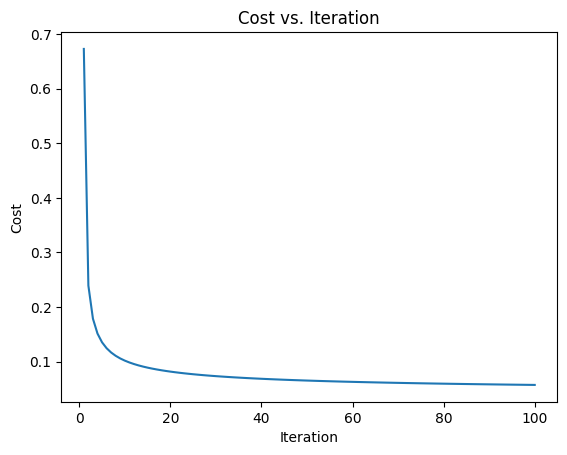

In [12]:
# plot cost during iteration 1 ~ 10000 
plt.plot(range(1, len(costs) + 1), costs)

plt.title("Cost vs. Iteration")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

### Plot decision boundary in x3, x4 space

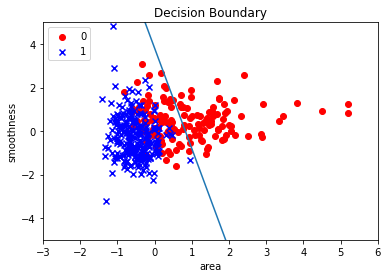

In [ ]:
# plotting data in x3(mean area), x4(mena smoothness) space
plt.scatter(X_train_std[y_train==0, 3], X_train_std[y_train==0, 4],
            color='red', marker='o', label='0')
plt.scatter(X_train_std[y_train==1, 3], X_train_std[y_train==1, 4],
            color='blue', marker='x', label='1')

plt.axis([-3, 6, -5, 5])

# decision boundary in x3, x4 space
x3 = np.arange(-5,5)
x4 = None
None

plt.xlabel('area')
plt.ylabel('smoothness')
plt.legend(loc='upper left')
plt.title('Decision Boundary')
plt.show()

### Accuracy of the model

In [13]:
# Compute the train accuracy of the model
y_pred = None
accuracy = None
print("Accuracy on the training set =", accuracy)

# Compute the test accuracy of the model
y_pred = None
accuracy = None
print("Accuracy on the training set =", accuracy)

ValueError: operands could not be broadcast together with shapes (398,) (6,) 

### Predict class of new data

In [ ]:
new_data = np.array([[11.2, 18.5, 78.3, 451.00, 0.092, 0.081, 0.031, 0.042, 0.19, 0.062,
                      0.33, 1.37, 2.33, 27.2, 0.0075, 0.016, 0.015, 0.010, 0.012, 0.0031,
                      14.8, 28.6, 92.3, 632.1, 0.17, 0.32, 0.26, 0.21, 0.38, 0.0943]])
# standardizing new_data
sc = None
None
new_data_std = None

print(new_data_std)

[[-0.81040387 -0.20004863 -0.54257553 -0.55723686 -0.35369336 -0.45358275
  -0.7203131  -0.18436828  0.29230371 -0.15060502 -0.25696325  0.31089387
  -0.25053599 -0.27024164  0.21836384 -0.52674695 -0.54547784 -0.30526892
  -1.03329333 -0.26720427 -0.29416565  0.44484725 -0.43381103 -0.4236021
   1.64341685  0.37871516 -0.09310786  1.3929505   1.38677111  0.53231628]]


In [ ]:
# compute probability (y_hat) and predict class
y_hat = None
y_pred = None

if y_pred[0] == 0:
    print('Prediction : Malignant')
    print('Probability : %.2f' % None)
if y_pred[0] == 1:
    print('Prediction : Benign')
    print('Probability : %.2f' % None)

Prediction : Malignant
Probability : 0.70


# Quiz 2 : Logistic Regression using scikit learn

## Find a model for cancer classification using Breast Cancer Wisconsin Dataset
- Train logistic regression model using all the features. The target class is 0(malignant) or 1(benign) 
- Use 70% of dataset for training, 30% for testing. Standardize the features
- Use from sklearn.linear_model.LogisticRegression

1. Show the learned model(parameters)
2. Show the train and test accuracies

- Retrain the model with 2 features - x3(mean area), x4(mean smoothness)

3. Show the learned model(parameters)
4. Show the decision boundary in x3(mean area), x4(mean smoothness) space

- Find best hyperparameter C
5. Plot the training and test accuracy for various C values (10e-5 ~ 10e+5).
   Train the model using all features.
   
- Retrain the model with best C value. Use all features.
6. Show the train and test accuracies
7. Predict the class of following data (you need standardization):
          [[11.2, 18.5, 78.3, 451.00, 0.092, 0.081, 0.031, 0.042, 0.19, 0.062,
            0.33, 1.37, 2.33, 27.2, 0.0075, 0.016, 0.015, 0.010, 0.012, 0.0031,
            14.8, 28.6, 92.3, 632.1, 0.17, 0.32, 0.26, 0.21, 0.38, 0.0943]]
8. Show the probability of prediction 

### Loading Breast Cancer Dataset

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

# Converting to dataFrame and show
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Prepare training and test dataset - standardize data

In [15]:
# get X, y. Use all data, all features
X = bc.data
y = bc.target

print(X.shape)
print(y.shape)
print('Class labels:', np.unique(y))
print(bc.target_names)

(569, 30)
(569,)
Class labels: [0 1]
['malignant' 'benign']


In [16]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [17]:
from sklearn.preprocessing import StandardScaler

# standardizing X
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Train the model 

In [18]:
from sklearn.linear_model import LogisticRegression

# training the model with C=0.1
lr = LogisticRegression(C=0.1, max_iter=10000)
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [20]:
# model parameters
print("w: ", lr.coef_)

print("b :", lr.intercept_)


w:  [[-0.34052209 -0.37381886 -0.32819294 -0.32879292 -0.16277963  0.0311552
  -0.35175452 -0.4675844  -0.03248097  0.21689752 -0.45315438  0.01105082
  -0.31916749 -0.33048578 -0.04717118  0.23274915  0.0087044  -0.15604048
   0.17714636  0.26633786 -0.45661157 -0.56302278 -0.40697472 -0.40438178
  -0.34390315 -0.1349887  -0.42750816 -0.46246318 -0.45962615 -0.06958354]]
b : [0.6050356]


### Accuracy of the model

In [22]:
# accuracy of the model
print('Accuracy: %.2f' % lr.score(X_train_std
                                  , y_train))
print('Accuracy: %.2f' % lr.score(X_test_std, y_test))

Accuracy: 0.98
Accuracy: 0.99


### Train the model using 2 features - x3, x4

In [23]:
from sklearn.linear_model import LogisticRegression

# training the model with C=1
lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1, random_state=1)

In [24]:
# model parameters
print('w = ', lr.coef_)
print('b = ', lr.intercept_)

w =  [[-0.36151014 -0.36590894 -0.31610122 -0.41880063 -0.18212827  0.62679803
  -0.74987144 -1.11026184  0.21782944  0.13788028 -1.24254311  0.15541981
  -0.60518674 -0.87138493 -0.17738092  0.59728543 -0.08110875 -0.47494075
   0.50330967  0.69838981 -0.8138174  -1.2879328  -0.53402497 -0.78196751
  -0.50440415  0.11569862 -0.97693569 -0.79835894 -1.19944887 -0.10073636]]
b =  [0.44233222]


### Plot decision boundary in x3, x4 space

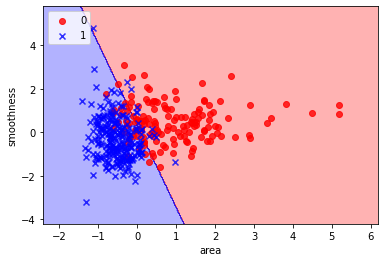

In [ ]:
# plot decision boundary of the model. Use plot_decision_regions()
plot_decision_regions(None, y_train, classifier=lr)

plt.xlabel('area')
plt.ylabel('smoothness')
plt.legend(loc='upper left')
plt.show()

### Plotting the training and test accuracy for various C values - Use all features

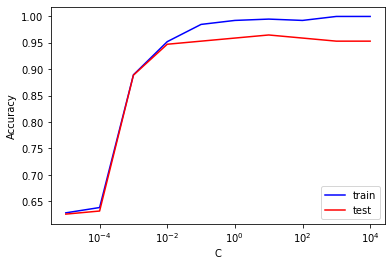

In [ ]:
params = []
train_acc = []
test_acc = []

# computing accuracies for C in 10**-5 to 10**5, max_iter=1000
for c in np.arange(-5, 5):    

    # learn the weights using LogisticRegression, max_iter=1000
    lr = None
    None
    
    params.append(None)
    train_acc.append(None)
    test_acc.append(None)

# plotting training and test accuracies
None
None

plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

### Train the model using best C value. Use all features

In [ ]:
from sklearn.linear_model import LogisticRegression

# training the model
lr = None
None

LogisticRegression(C=10, random_state=1)

### Accuracy of the model

In [ ]:
# accuracy of the model
print('Accuracy: %.2f' % None)
print('Accuracy: %.2f' % None)

Accuracy: 0.99
Accuracy: 0.96


### Predict class of new data

In [ ]:
new_data = np.array([[11.2, 18.5, 78.3, 451.00, 0.092, 0.081, 0.031, 0.042, 0.19, 0.062,
                      0.33, 1.37, 2.33, 27.2, 0.0075, 0.016, 0.015, 0.010, 0.012, 0.0031,
                      14.8, 28.6, 92.3, 632.1, 0.17, 0.32, 0.26, 0.21, 0.38, 0.0943]])

# standardizing new_data
sc = None
None
new_data_std = None
new_data_std

array([[-0.81040387, -0.20004863, -0.54257553, -0.55723686, -0.35369336,
        -0.45358275, -0.7203131 , -0.18436828,  0.29230371, -0.15060502,
        -0.25696325,  0.31089387, -0.25053599, -0.27024164,  0.21836384,
        -0.52674695, -0.54547784, -0.30526892, -1.03329333, -0.26720427,
        -0.29416565,  0.44484725, -0.43381103, -0.4236021 ,  1.64341685,
         0.37871516, -0.09310786,  1.3929505 ,  1.38677111,  0.53231628]])

In [ ]:
# predict class and compute probability
pred = None
prob = None

if pred[0]== 0:
    print('Prediction : Malignant')
    print('Probability : %.2f' % None)
if pred[0]== 1:
    print('Prediction : Benign')
    print('Probability : %.2f' % None)

Prediction : Malignant
Probability : 0.88
